In [13]:
import os
import os.path as osp
import torch
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

from utils import load_pkl, save_pkl

In [2]:
def load_concept_embedding(data_root, model_name):
    action_classes = os.listdir(data_root)
    concept_embedding_dict = dict()
    for action in tqdm(action_classes):
        pkl_path = osp.join(data_root, action, model_name, '{}_concept_embedding.pkl'.format(action))
        if osp.exists(pkl_path):
            embeddings = load_pkl(pkl_path)
            concept_embedding_dict[action] = embeddings
    return concept_embedding_dict

In [3]:
data_root = '/data/shufan/shufan/MCT/data/kinetics400/model_embeddings/neural_level'
model_name = 'timesformer'

In [4]:
concept_embedding_dict = load_concept_embedding(data_root, model_name)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [08:29<00:00,  1.27s/it]


In [5]:
len(concept_embedding_dict)

368

In [6]:
def defaultdict_list():
    return defaultdict(list)

In [7]:
layer_concept_dict = defaultdict(defaultdict_list)
for action, action_dict in concept_embedding_dict.items():
    for concept_name, concept_emb in concept_embedding_dict[action].items():
        for video_name, video_emb in concept_emb.items():
            for layer_name, layer_emb in video_emb.items():
                layer_concept_dict[layer_name][concept_name].append(layer_emb)

In [8]:
for layer_name, layer_dict in layer_concept_dict.items():
    for concept_name, concept_list in layer_dict.items():
        layer_concept_dict[layer_name][concept_name] = torch.stack(concept_list, dim=0)

In [9]:
# 对每一层，可视化每个神经元对不同概念的激活程度，观察是否由功能性神经元与多义神经元的区分
# 更进一步，观察每个神经元对同一类概念的激活程度，观察神经元对类内的感知程度

In [36]:
layer_name = list(layer_concept_dict.keys())[-1]
concept_emb_dict = layer_concept_dict[layer_name]
layer_matrix = []
for concept_name, matrix in concept_emb_dict.items():
    layer_matrix.append(matrix.mean(0))
layer_matrix = torch.stack(layer_matrix, dim=0).squeeze()

In [37]:
layer_matrix.size()

torch.Size([79, 768])

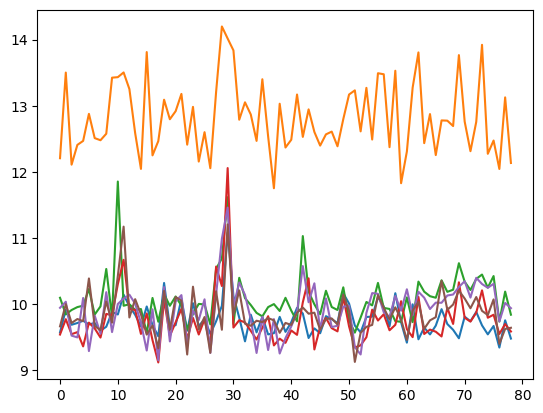

In [39]:
plt.plot(layer_matrix.T[0])
plt.plot(layer_matrix.T[1])
plt.plot(layer_matrix.T[2])
plt.plot(layer_matrix.T[3])
plt.plot(layer_matrix.T[4])
plt.plot(layer_matrix.T[5])